In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [2]:
dos = np.genfromtxt( "./NiO.dos" )
dos_Ni = np.genfromtxt( "./NiO.Ni.dos.dat" )
dos_O  = np.genfromtxt( "./NiO.O.dos.dat" )

14.92


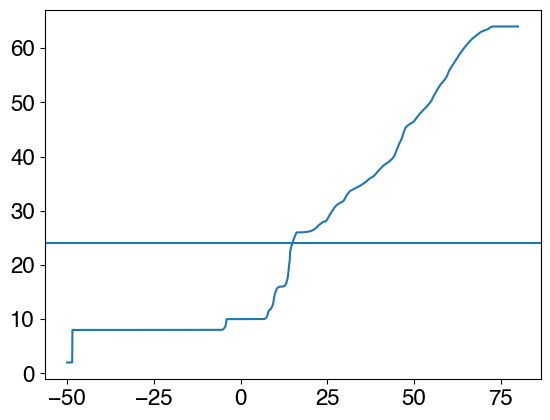

In [6]:
## Here we use a more elegant way of determining the Fermi energy
## Instead of taking it from QE output, we determine it from the DOS integral
nfu = 1
nelect = 24.00
ax = plt.gca()

itdos = dos[:,2]/nfu
plt.plot(dos[:,0], itdos[:])
index = (np.abs(itdos-nelect/nfu)).argmin()
Ef = dos[index,0]


print(Ef)
ax.axhline(nelect/nfu)

In [7]:
dos[:,0] = dos[:,0] - Ef
dos_Ni[:,0] = dos_Ni[:,0] - Ef
dos_O[:,0]  = dos_O[:,0] - Ef

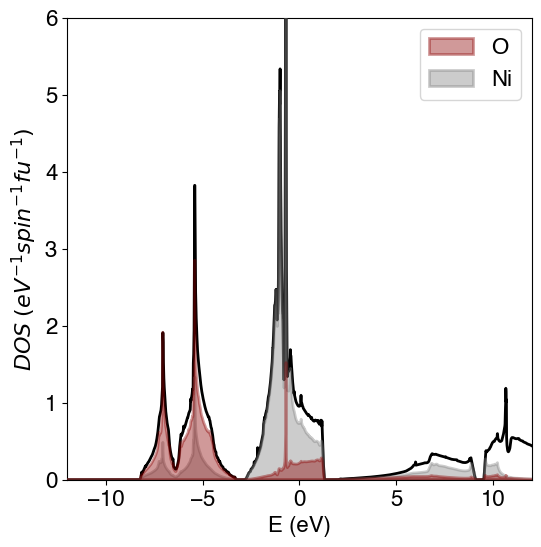

In [18]:
fig, axs = plt.subplots(1,1, sharex=False, sharey=True, figsize=(6,6))
fig.subplots_adjust(hspace=0.125, wspace=0.145)
axs.set_xlabel(r"E (eV)")
axs.set_ylabel(r"$DOS$ $(eV^{-1} spin^{-1} fu^{-1})$")
axs.set_xlim(-12.0, 12.0)
axs.set_ylim(0.0, 6.0)

axs.axhline(0, color="black", alpha=0.40)

alpha, lw = 0.4, 2
axs.plot(dos[:,0], dos[:,1]/nfu/2, color = 'k', linewidth=lw)
axs.fill_between(dos_O[:,0], dos_O[:,1]/nfu/2, 
            color = "darkred", linewidth=lw, label='O', alpha=alpha, zorder = 10)
axs.fill_between(dos_Ni[:,0], dos_Ni[:,1]/nfu/2, 
            color = "grey", linewidth=lw, label='Ni', alpha=alpha, zorder = 5)

axs.legend()

fig.savefig('NiO_DOS.png', transparent=False, dpi=300)